<a href="https://colab.research.google.com/github/DrR7data/data-science-porfolio/blob/main/Using_CUDA_and_Numba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numba


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
from pylab import imshow, show
from timeit import default_timer as timer


In [6]:
def mandel(x, y, max_iters):
  """
  """
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return max_iters

In [7]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_sixe_x = (max_x - min_x) / width
  pixel_sixe_y = (max_y - min_y) / height

  for x in range(width):
    real = min_x + x * pixel_sixe_x
    for y in range(height):
      imag = min_y + y * pixel_sixe_y
      color = mandel(real, imag, iters)
      image[y, x] = color




Mandelbrot created in 4.850216 s


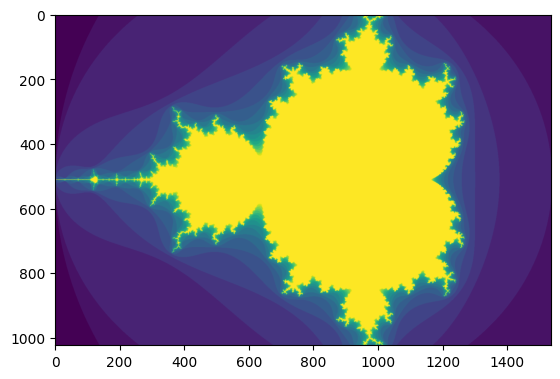

In [12]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
dt = timer() - start


print("Mandelbrot created in %f s" % dt)
imshow(image)
show()

Numba Mandelbrot
numba is LLVM support for Python
Run Numba MandelBrot


In [11]:
@jit
def mandel(x, y, max_iters):
  """
  """
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return max_iters
@jit

SyntaxError: incomplete input (ipython-input-4019869764.py, line 12)

In [ ]:

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_sixe_x = (max_x - min_x) / width
  pixel_sixe_y = (max_y - min_y) / height

  for x in range(width):
    real = min_x + x * pixel_sixe_x
    for y in range(height):
      imag = min_y + y * pixel_sixe_y
      color = mandel(real, imag, iters)
      image[y, x] = color


In [ ]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
dt = timer() - start


print("Mandelbrot created in %f s" % dt)
imshow(image)
show()